<a href="https://colab.research.google.com/github/nasywafunnisa/pengolahan-citra-digital/blob/main/tugas_model_warna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  ANALISIS MODEL WARNA – DETEKSI OBJEK APEL MERAH


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (16). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)



[Terang] Grayscale
  Memori        : 117.2 KB
  Level unik    : ori=5, uniform=4, kmeans=5
  Rasio kompresi: uniform=1.2x, kmeans=1.0x
  Waktu (ms)    : uniform=0.16, kmeans=719.63


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (16). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)



[Terang] HSV
  Memori        : 351.6 KB
  Level unik    : ori=11, uniform=8, kmeans=13
  Rasio kompresi: uniform=1.4x, kmeans=0.8x
  Waktu (ms)    : uniform=0.41, kmeans=1026.53


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (16). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)



[Terang] LAB
  Memori        : 351.6 KB
  Level unik    : ori=15, uniform=8, kmeans=15
  Rasio kompresi: uniform=1.9x, kmeans=1.0x
  Waktu (ms)    : uniform=0.38, kmeans=1043.15


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (16). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)



[Normal] Grayscale
  Memori        : 117.2 KB
  Level unik    : ori=5, uniform=4, kmeans=5
  Rasio kompresi: uniform=1.2x, kmeans=1.0x
  Waktu (ms)    : uniform=0.18, kmeans=659.30


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (16). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)



[Normal] HSV
  Memori        : 351.6 KB
  Level unik    : ori=13, uniform=7, kmeans=12
  Rasio kompresi: uniform=1.9x, kmeans=1.1x
  Waktu (ms)    : uniform=0.55, kmeans=678.76


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (16). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)



[Normal] LAB
  Memori        : 351.6 KB
  Level unik    : ori=15, uniform=6, kmeans=14
  Rasio kompresi: uniform=2.5x, kmeans=1.1x
  Waktu (ms)    : uniform=0.53, kmeans=669.62


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (16). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)



[Redup] Grayscale
  Memori        : 117.2 KB
  Level unik    : ori=4, uniform=3, kmeans=4
  Rasio kompresi: uniform=1.3x, kmeans=1.0x
  Waktu (ms)    : uniform=0.14, kmeans=599.37


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (16). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)



[Redup] HSV
  Memori        : 351.6 KB
  Level unik    : ori=13, uniform=9, kmeans=14
  Rasio kompresi: uniform=1.4x, kmeans=0.9x
  Waktu (ms)    : uniform=0.51, kmeans=684.50


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (16). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)



[Redup] LAB
  Memori        : 351.6 KB
  Level unik    : ori=13, uniform=7, kmeans=14
  Rasio kompresi: uniform=1.9x, kmeans=0.9x
  Waktu (ms)    : uniform=0.53, kmeans=676.27


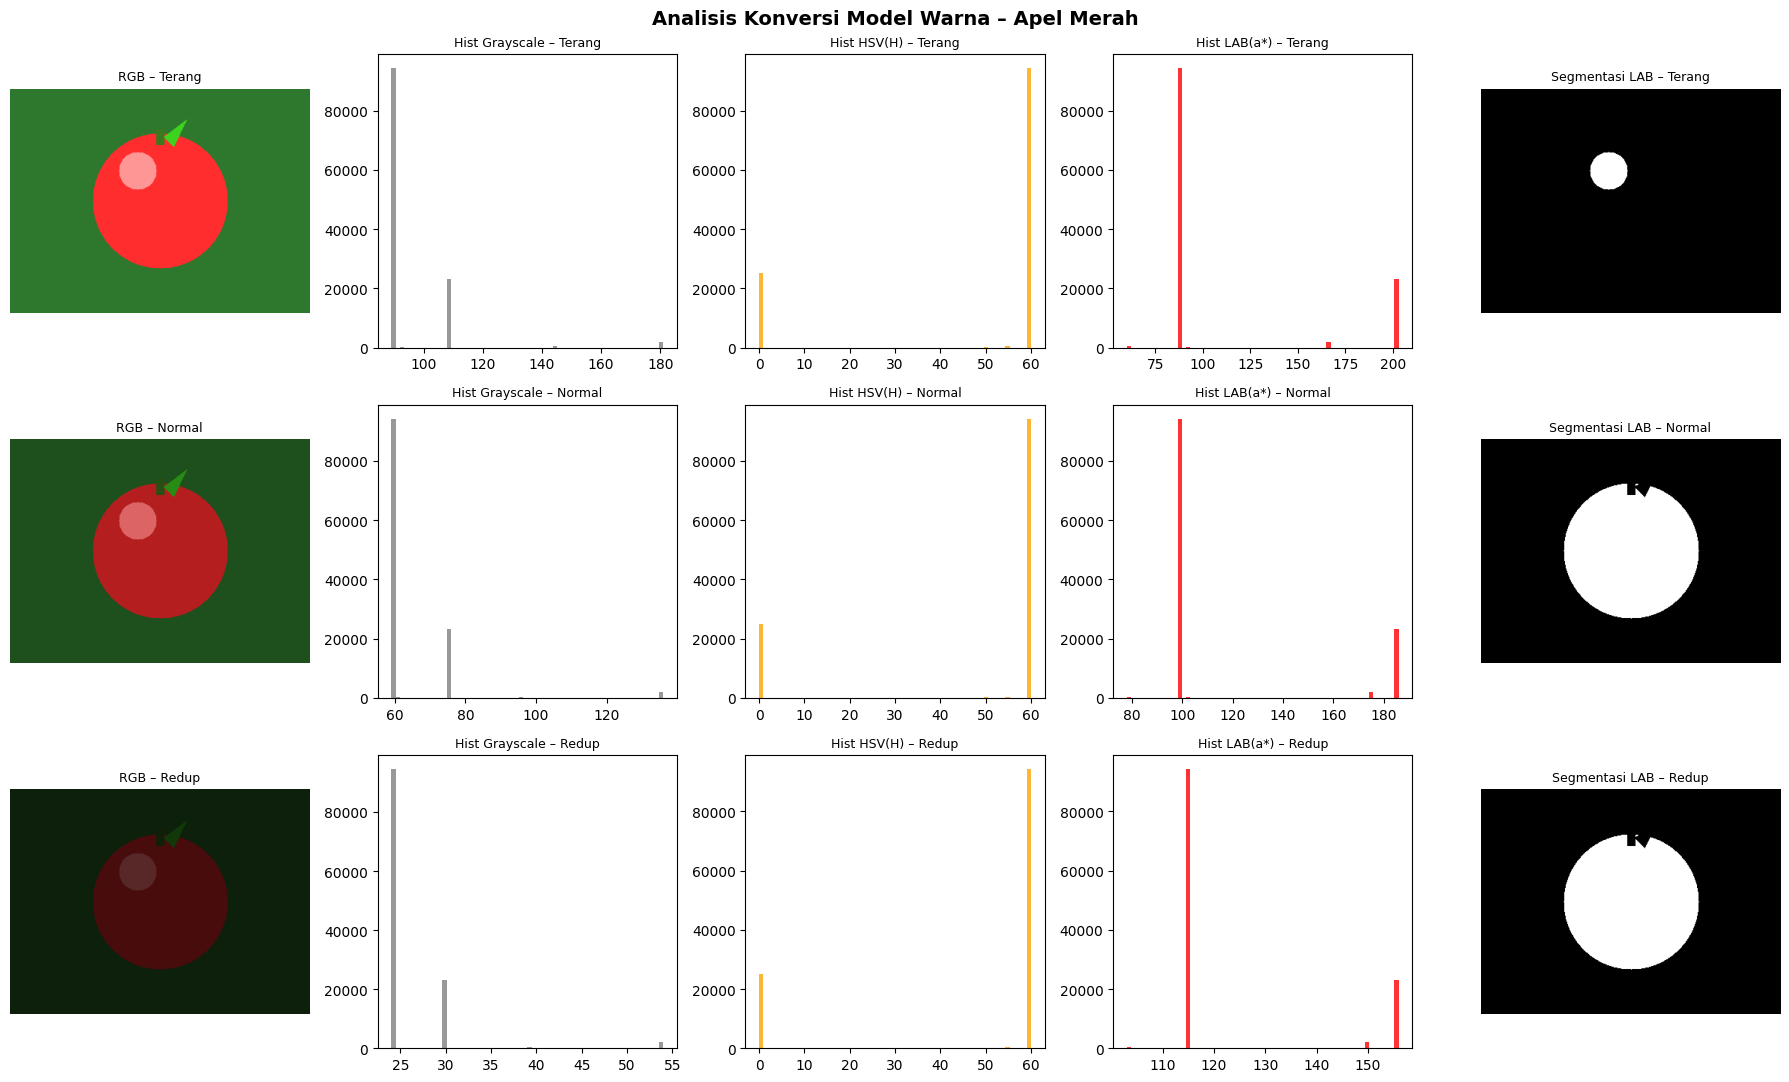


Selesai. File visualisasi: hasil_analisis.png


In [3]:
# ============================================================
# Proyek Mini: Konversi Model Warna & Kuantisasi
# Objek: Apel Merah | Python 3.x + OpenCV + NumPy + sklearn
# ============================================================

import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import time

# ── 1. BUAT CITRA SINTETIS ───────────────────────────────────
def create_apple(brightness=1.0):
    img = np.zeros((300, 400, 3), dtype=np.uint8)
    img[:]= [30, 80, 30]
    cv2.circle(img, (200,150), 90, (30, 30,180), -1)
    cv2.circle(img, (170,110), 25, (100,100,220), -1)
    cv2.rectangle(img, (195,55),(205,75),(20,80,40),-1)
    pts = np.array([[205,65],[235,42],[218,78]], np.int32)
    cv2.fillPoly(img, [pts], (20,140,40))
    return np.clip(img.astype(np.float32)*brightness,0,255).astype(np.uint8)

images = {
    "Terang": create_apple(1.5),
    "Normal": create_apple(1.0),
    "Redup" : create_apple(0.4),
}

# ── 2. KONVERSI RUANG WARNA ──────────────────────────────────
def convert_spaces(bgr):
    return {
        "RGB"      : cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB),
        "Grayscale": cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY),
        "HSV"      : cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV),
        "LAB"      : cv2.cvtColor(bgr, cv2.COLOR_BGR2LAB),
    }

# ── 3. KUANTISASI ────────────────────────────────────────────
def quantize_uniform(img, levels=16):
    step = 256 // levels
    return (img.astype(np.uint16) // step * step).astype(np.uint8)

def quantize_nonuniform(img, k=16):
    sh   = img.shape
    flat = img.reshape(-1,1) if img.ndim==2 else img.reshape(-1, sh[2])
    flat_f = flat.astype(np.float32)
    km   = KMeans(n_clusters=k, random_state=42, n_init=5, max_iter=100)
    lbl  = km.fit_predict(flat_f)
    cent = km.cluster_centers_.astype(np.uint8)
    return cent[lbl].reshape(sh)

# ── 4. ANALISIS PARAMETER ────────────────────────────────────
def analyze_params(img, img_name, space_name):
    t0    = time.perf_counter()
    q_uni = quantize_uniform(img, 16)
    t_uni = (time.perf_counter()-t0)*1000

    t0    = time.perf_counter()
    q_non = quantize_nonuniform(img, 16)
    t_non = (time.perf_counter()-t0)*1000

    u_ori = len(np.unique(img))
    u_uni = len(np.unique(q_uni))
    u_non = len(np.unique(q_non))

    print(f"\n[{img_name}] {space_name}")
    print(f"  Memori        : {img.nbytes/1024:.1f} KB")
    print(f"  Level unik    : ori={u_ori}, uniform={u_uni}, kmeans={u_non}")
    print(f"  Rasio kompresi: uniform={u_ori/u_uni:.1f}x, kmeans={u_ori/u_non:.1f}x")
    print(f"  Waktu (ms)    : uniform={t_uni:.2f}, kmeans={t_non:.2f}")
    return q_uni, q_non

# ── 5. SEGMENTASI ────────────────────────────────────────────
def segment_hsv(bgr):
    hsv = cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV)
    m1  = cv2.inRange(hsv,(0, 80,50),(10, 255,255))
    m2  = cv2.inRange(hsv,(170,80,50),(180,255,255))
    return cv2.bitwise_or(m1,m2)

def segment_lab(bgr):
    lab = cv2.cvtColor(bgr, cv2.COLOR_BGR2LAB)
    return cv2.inRange(lab,(20,140,120),(255,255,180))

# ── 6. VISUALISASI ───────────────────────────────────────────
def visualize_all(images):
    fig, axes = plt.subplots(3, 5, figsize=(18, 11))
    fig.suptitle("Analisis Konversi Model Warna – Apel Merah", fontsize=14, fontweight='bold')

    for row, (cond, bgr) in enumerate(images.items()):
        sp   = convert_spaces(bgr)
        gray = sp["Grayscale"]
        hsv  = sp["HSV"]
        lab  = sp["LAB"]

        # Col 0: Citra asli
        axes[row,0].imshow(cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB))
        axes[row,0].set_title(f"RGB – {cond}", fontsize=9)
        axes[row,0].axis('off')

        # Col 1: Grayscale + histogram
        axes[row,1].hist(gray.ravel(), bins=64, color='gray', alpha=0.8)
        axes[row,1].set_title(f"Hist Grayscale – {cond}", fontsize=9)

        # Col 2: HSV Hue histogram
        axes[row,2].hist(hsv[:,:,0].ravel(), bins=64, color='orange', alpha=0.8)
        axes[row,2].set_title(f"Hist HSV(H) – {cond}", fontsize=9)

        # Col 3: LAB a* histogram
        axes[row,3].hist(lab[:,:,1].ravel(), bins=64, color='red', alpha=0.8)
        axes[row,3].set_title(f"Hist LAB(a*) – {cond}", fontsize=9)

        # Col 4: Mask segmentasi (LAB)
        mask = segment_lab(bgr)
        axes[row,4].imshow(mask, cmap='gray')
        axes[row,4].set_title(f"Segmentasi LAB – {cond}", fontsize=9)
        axes[row,4].axis('off')

    plt.tight_layout()
    plt.savefig("hasil_analisis.png", dpi=130, bbox_inches='tight')
    plt.show()

# ── 7. MAIN ──────────────────────────────────────────────────
if __name__ == "__main__":
    print("=" * 55)
    print("  ANALISIS MODEL WARNA – DETEKSI OBJEK APEL MERAH")
    print("=" * 55)

    for cond, bgr in images.items():
        sp = convert_spaces(bgr)
        for sname, simg in [("Grayscale", sp["Grayscale"]),
                             ("HSV",       sp["HSV"]),
                             ("LAB",       sp["LAB"])]:
            analyze_params(simg, cond, sname)

    visualize_all(images)
    print("\nSelesai. File visualisasi: hasil_analisis.png")